# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
import scipy.stats as st
#from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
! pip install citipy

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

In [ ]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#api.openweathermap.org/data/2.5/weather?

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

weatherData_response = requests.get(query_url + city)
weatherData_json = weatherData_response.json()
pprint.pprint(weatherData_json) # to see a clear view of the output(json)


{'base': 'stations',
 'clouds': {'all': 19},
 'cod': 200,
 'coord': {'lat': 22.4, 'lon': -99.6},
 'dt': 1614148372,
 'id': 3530598,
 'main': {'feels_like': 53.01,
          'humidity': 66,
          'pressure': 1018,
          'temp': 55,
          'temp_max': 55,
          'temp_min': 55},
 'name': 'Ciudad del Maíz',
 'sys': {'country': 'MX',
         'id': 2021846,
         'sunrise': 1614171812,
         'sunset': 1614213596,
         'type': 3},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'gust': 5.01, 'speed': 1.01}}


In [6]:
#Create an empty list to hold values
name_of_city = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temperatureMAX = []
cloudiness = []
wind_speed = []

processing_record = 1  # set counter to 1 since it is a repeated count in the loop

# To print Log statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#looping the the cities generated above with the random lat and lng
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name_of_city.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperatureMAX.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("Can find city. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hermanus
Processing Record 2 | Coquimbo
Processing Record 3 | Key West
Processing Record 4 | Busselton
Processing Record 5 | Kahului
Processing Record 6 | Am Timan
Can find city. Skipping...
Processing Record 7 | Hirschaid
Can find city. Skipping...
Processing Record 8 | New Norfolk
Processing Record 9 | Geraldton
Processing Record 10 | Tuatapere
Processing Record 11 | Puerto Ayora
Processing Record 12 | Bluff
Processing Record 13 | Finschhafen
Processing Record 14 | Narsaq
Processing Record 15 | Batabanó
Processing Record 16 | Kamiiso
Processing Record 17 | Albany
Processing Record 18 | Ushuaia
Processing Record 19 | Dunedin
Processing Record 20 | Rikitea
Processing Record 21 | Severnoye
Processing Record 22 | Hilo
Processing Record 23 | Tucumã
Processing Record 24 | Muzhi
Processing Record 25 | Severo-Kuril'sk
Processing Record 26 | Mugur-Aksy
Can find city. Skipping...
Processing Record 27 | Punta Arenas


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weatherDataAB = {
    "City": name_of_city,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": temperatureMAX,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weatherData_df = pd.DataFrame(weatherDataAB)
weatherData_df.count()
weatherData_df.head(10)
weatherData_df.to_csv("../weatherData1_df.csv")

In [8]:
weather_path = "../weatherData1_df.csv"
weather_details = pd.read_csv(weather_path)
weather_details

,Unnamed: 0,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,0,Hermanus,ZA,1614148381,-34.4187,19.2345,64.99,93,21,6.87
1,1,Coquimbo,CL,1614148382,-29.9533,-71.3436,59.00,94,90,3.44
2,2,Key West,US,1614148383,24.5557,-81.7826,73.00,84,0,3.00
3,3,Busselton,AU,1614148383,-33.6500,115.3333,82.00,53,76,4.00
4,4,Kahului,US,1614148384,20.8947,-156.4700,73.40,68,20,16.11
...,...,...,...,...,...,...,...,...,...,...
594,594,Calabozo,VE,1614148558,8.9242,-67.4293,76.35,73,100,9.17
595,595,Kirkenes,NO,1614148558,69.7271,30.0458,21.20,85,20,12.66
596,596,Iracoubo,GF,1614148558,5.4802,-53.2011,77.25,87,100,14.25
597,597,Marmande,FR,1614148559,44.5000,0.1667,53.01,93,4,7.00


In [10]:
#No city with humidity greater than 100, the below was performed to check
MaskO = weather_details['Humidity'] > 100
Blacksheep = weather_details.loc[MaskO]
Blacksheep

,Unnamed: 0,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

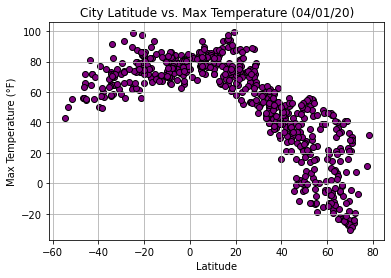

In [11]:
plt.scatter(weather_details["Latitude"], weather_details["Max Temperature"], facecolors="purple", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images_graph/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()


## Latitude vs. Humidity Plot

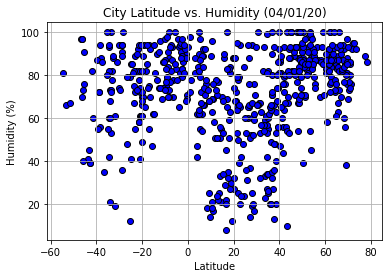

In [12]:
plt.scatter(weather_details["Latitude"], weather_details["Humidity"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images_graph/City_Latitude_VsHumidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

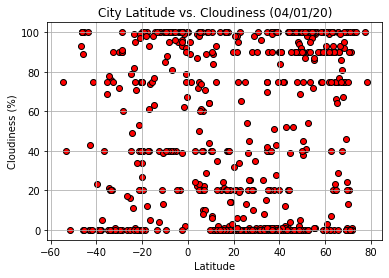

In [14]:
plt.scatter(weather_details["Latitude"], weather_details["Cloudiness"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images_graph/LatitudeVsCloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

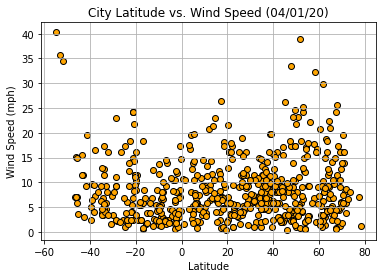

In [15]:
plt.scatter(weather_details["Latitude"], weather_details["Wind Speed"], facecolors="orange", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("../Images_graph/LatitudeVsWindspeed.png")

# Show Plot
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
#Northern Hemisphere are regions where the latitude are greater than 0 and Southern Hemispher

Northernhemispshere = weather_details.loc[weather_details["Latitude"] > 0]
Northernhemispshere


,Unnamed: 0,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
2,2,Key West,US,1614148383,24.5557,-81.7826,73.00,84,0,3.00
4,4,Kahului,US,1614148384,20.8947,-156.4700,73.40,68,20,16.11
5,5,Am Timan,TD,1614148385,11.0297,20.2827,77.11,17,89,13.33
6,6,Hirschaid,DE,1614148386,49.8194,10.9908,43.00,91,0,1.01
13,13,Narsaq,GL,1614148388,60.9167,-46.0500,19.40,58,90,3.44
...,...,...,...,...,...,...,...,...,...,...
594,594,Calabozo,VE,1614148558,8.9242,-67.4293,76.35,73,100,9.17
595,595,Kirkenes,NO,1614148558,69.7271,30.0458,21.20,85,20,12.66
596,596,Iracoubo,GF,1614148558,5.4802,-53.2011,77.25,87,100,14.25
597,597,Marmande,FR,1614148559,44.5000,0.1667,53.01,93,4,7.00


In [104]:
# corr=round(st.pearsonr(x_values ,y_values)[0],2)
# corr

-0.88

In [17]:
# Southernhemispshere
Southernhemispshere = weather_details.loc[weather_details["Latitude"] < 0]
Southernhemispshere

,Unnamed: 0,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,0,Hermanus,ZA,1614148381,-34.4187,19.2345,64.99,93,21,6.87
1,1,Coquimbo,CL,1614148382,-29.9533,-71.3436,59.00,94,90,3.44
3,3,Busselton,AU,1614148383,-33.6500,115.3333,82.00,53,76,4.00
7,7,New Norfolk,AU,1614148387,-42.7826,147.0587,72.00,39,43,3.00
8,8,Geraldton,AU,1614148281,-28.7667,114.6000,93.20,36,0,23.02
...,...,...,...,...,...,...,...,...,...,...
572,572,Omboué,GA,1614148553,-1.5746,9.2618,80.47,81,99,0.96
574,574,Pão de Açúcar,BR,1614148553,-9.7483,-37.4367,75.88,77,40,4.41
575,575,Fonte Boa,BR,1614148554,-2.4959,-66.2662,73.54,97,100,1.70
588,588,Presidencia Roque Sáenz Peña,AR,1614148557,-26.7852,-60.4388,75.00,79,17,1.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7356357679755835


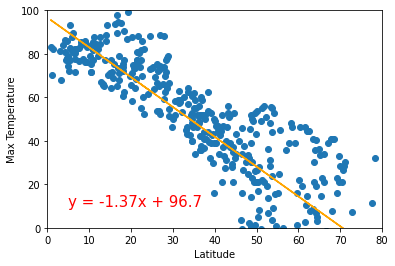

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = Northernhemispshere["Latitude"]
y_values = Northernhemispshere["Max Temperature"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"orange")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/North_Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.25652503344254424


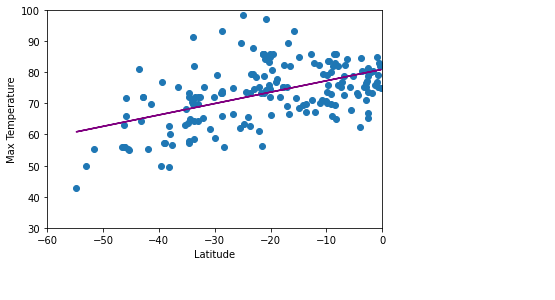

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = Southernhemispshere["Latitude"]
y_values = Southernhemispshere["Max Temperature"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"purple")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/South_Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1655857092430669


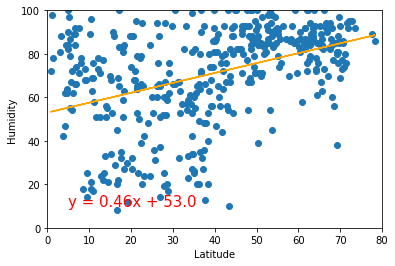

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = Northernhemispshere["Latitude"]
y_values = Northernhemispshere["Humidity"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"orange")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/North_Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0935697092723848


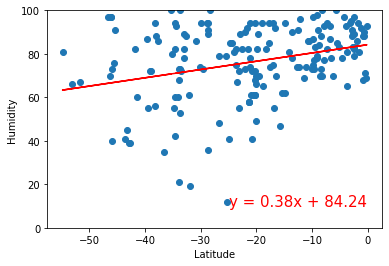

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = Southernhemispshere["Latitude"]
y_values = Southernhemispshere["Humidity"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)


print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/South_Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0631123919711994


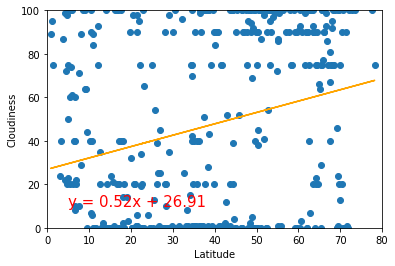

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = Northernhemispshere["Latitude"]
y_values = Northernhemispshere["Cloudiness"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"orange")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/North_Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16077631281724794


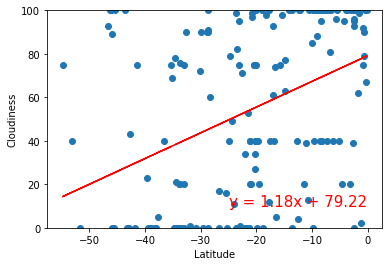

In [25]:
x_values = Southernhemispshere["Latitude"]
y_values = Southernhemispshere["Cloudiness"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)


print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/South_Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003030461906064264


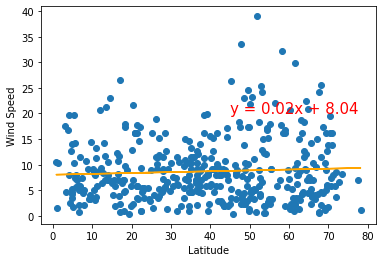

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = Northernhemispshere["Latitude"]
y_values = Northernhemispshere["Wind Speed"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"orange")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

plt.savefig("../Images_graph/North_Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10104524099830628


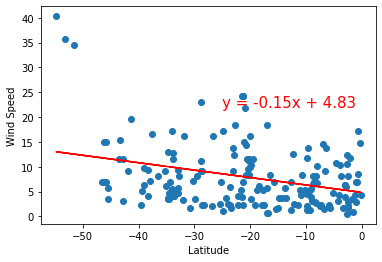

In [28]:
x_values = Southernhemispshere["Latitude"]
y_values = Southernhemispshere["Wind Speed"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,22),fontsize=15,color="red")


print(f"The r-squared is: {rvalue**2}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

# plt.savefig("../Images_graph/South_Humidity vs. Latitude Linear Regression.png")